# 3. Clasificación
    
En este notebook vamos a aprender los fundamentos de la clasificación, y para ello vamos a utilizar el dataset llamado MNIST. Este dataset contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y por trabajadores de la oficina del censo de los Estados Unidos. Cada imagen está etiquetada con el dígito que representa.

Este dataset es muy famoso, es como el "hello world" de la clasificación, y cuando alguien desarrolla algún algoritmo de clasificación, siente curiosidad por ver cómo se comporta el algoritmo de clasificación sobre este conjunto de datos.

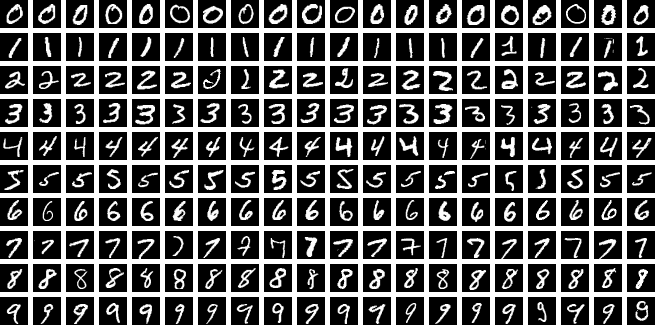

Para el aprendizaje, vamos a utilizar scikit-learn, que es un módulo de Python para aprendizaje automático construido sobre SciPy y distribuido bajo la licencia BSD de 3 cláusulas. El proyecto se inició en 2007 por David Cournapeau como un proyecto de Google Summer of Code, y desde entonces muchos voluntarios han contribuido.

Scikit-Learn proporciona algunas funciones de ayuda que permiten descargar algunos datasets famosos, incluido este. El siguiente código nos va a ayudar a descargar este conjunto de datos

In [1]:
# El proyecto requiere una versión de python 3.7 o superior
import sys
assert sys.version_info >= (3, 7)

In [2]:
# Verificar que la versión de scikit-learn es al menos la 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
# Configuración de Matplotlib, para mejorar la legibilidad de los gráficos
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
# Función para guardar las figuras generadas, en una carpeta específica.
# Las figuras se guardan en formato PNG con una resolución de 300 dpi.
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

El paquete `sklearn.dataset` contiene principalmente tres tipos de funciones:

- **`fetch_*`**: para descargar conjuntos de datos reales
- **`load_*`**: para cargar pequeños conjuntos de prueba incluidos en el paquete sin necesidad de utilizar internet
- **`make_*`**: para generar conjuntos de datos para probar

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

En general, los conjuntos de datos se devuelven como una tupla (X,y) que contienen los datos de entrada y los datos objetivo (input, target), ambos como arrays numPy.

In [7]:
# Exploramos las claves disponibles en el objeto mnist
# El dataset MNIST contiene varios atributos, pero principalmente usaremos 'data' y 'target'
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
# Extraemos los datos de entrada (X) y las etiquetas objetivo (y) del dataset
# X contiene las imágenes de dígitos representadas como arrays de píxeles
# y contiene las etiquetas (los dígitos del 0 al 9) correspondientes a cada imagen
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
# Visualizamos la matriz X (características de entrada)
# Cada fila representa una imagen y cada columna representa un píxel
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# Verificamos la forma (shape) del array X
# El resultado (70000, 784) significa:
# - 70,000 imágenes en total
# - 784 características por imagen (28x28 píxeles = 784)
X.shape

(70000, 784)

In [11]:
# Visualizamos el vector y (etiquetas objetivo)
# Cada elemento es un dígito del '0' al '9' que representa qué número muestra cada imagen
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [12]:
# Verificamos la forma del vector y
# El resultado (70000,) significa que tenemos 70,000 etiquetas, una por cada imagen
y.shape

(70000,)

In [13]:
# Calculamos el número total de píxeles en cada imagen del dataset MNIST
# Cada imagen tiene dimensiones de 28x28 píxeles, lo que resulta en 784 características
# Este número coincide con la segunda dimensión de X.shape que vimos anteriormente
28*28

784

Hay 70.000 imagenes y cada imagen tiene 784 features (caracteristicas). esto es así porque cada imagen tiene 28x28 pixeles, y cada caracteristica represetna la intensidad de cada uno de los pixeles de la imagen (de 0 a 255, de blanco a negro)

Echemos un vistazo a una de las cifras del conjunto de datos. Todo lo que necesitamos hacer es tomar el vector de características de una instancia, convertirlo a un array de 28 × 28 y mostrarlo usando la función `imshow()` de Matplotlib. Usamos `cmap="binary"` para obtener un mapa de colores en escala de grises donde 0 es blanco y 255 es negro.


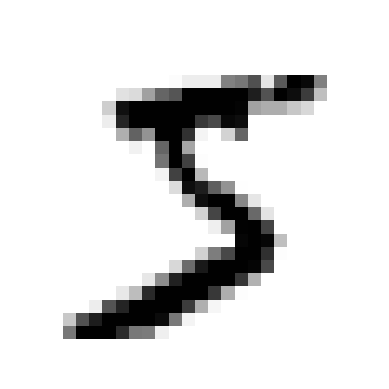

In [14]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [15]:
# Verificamos la etiqueta (label) del primer dígito que visualizamos anteriormente
# Esto nos confirma qué número representa la imagen que acabamos de mostrar
y[0]

'5'

Para dar una idea de la complejidad de la tarea de clasificacion, vamos a mostrar algunas imagenes adicionales del conjunto de datos de MNIST. Pero antes, y muy importante, siempre debemos crear un conjunto de datos de test y apartarlo desde el inicio antes de revisar los datos con mas detenimiento, para prevenir posibles sesgos. 

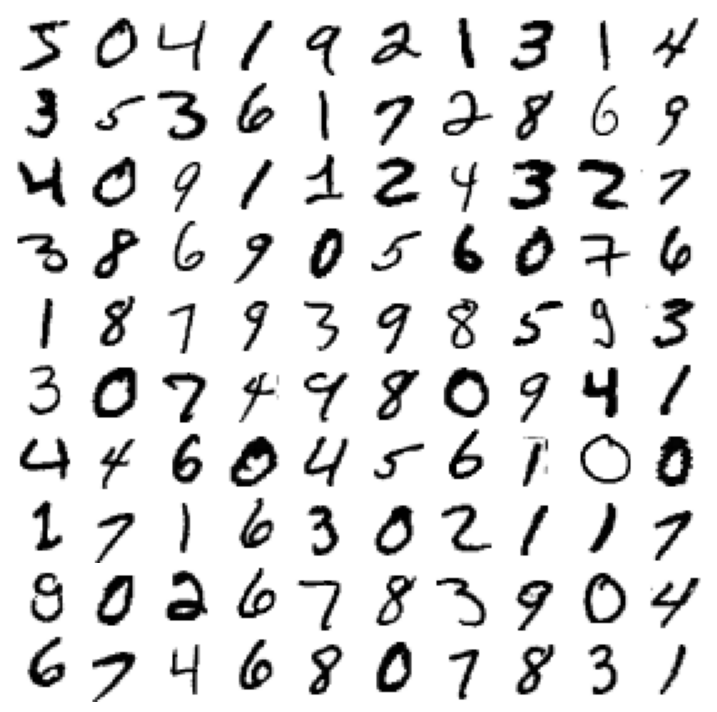

In [16]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

El conjunto de datos MNIST ya viene dividido en conjunto de entrenamiento (60.000 primeras muestras) y conjunto de prueba o test set (últimas 10.000 muestras), con lo cual:

In [17]:
# Dividimos el dataset MNIST en conjuntos de entrenamiento y prueba
# El dataset MNIST ya viene pre-dividido:
# - Primeras 60,000 muestras: conjunto de entrenamiento (training set)
# - Últimas 10,000 muestras: conjunto de prueba (test set)
# X_train, X_test: características (imágenes) para entrenar y probar
# y_train, y_test: etiquetas (dígitos del 0-9) para entrenar y probar
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

El conjunto de entrenamiento ya está barajado por nosotros, lo cual es bueno porque garantiza que todos los pliegues de la validación cruzada serán similares (no queremos que a un pliegue le falten algunos dígitos). Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y tienen un rendimiento deficiente si reciben muchas instancias similares seguidas. Barajar el conjunto de datos asegura que esto no ocurra.

## 3.1. Entrenar un Clasificador Binario

Por ahora, vamos a simplificar el problema y vamos a intentar identificar un único dígito, el dígito '5'. este detector de '5' será un ejemplo de un clasificador binario, capaz de detectar el número '5' y detectar lo que no es el número '5' (de ahí lo de clasificador binario).

primero, crearemos los vectores objetivo para esta tarea de clasificacion:

In [18]:
# Creamos vectores objetivo para el clasificador binario de detección de '5'
# y_train_5: True para todos los '5', False para todos los demás dígitos (conjunto de entrenamiento)
# y_test_5: True para todos los '5', False para todos los demás dígitos (conjunto de prueba)
# Estos vectores booleanos nos permiten entrenar un clasificador que distingue entre "es 5" y "no es 5"
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Vamos ahora a escoger un clasificador y entrenarlo. Un clasificador interesante para comenzar es el **clasificador SGD** (Stochastic Gradient Descent) o clasificador de descenso de gradiente estocástico, usando la clase `SGDClassifier`. 

Este clasificador es capaz de manejar conjuntos de datos muy grandes de manera muy eficiente. Esto es en parte porque trata las muestras de entrenamiento de manera individual, lo que también lo hace adecuado para el aprendizaje en línea (online learning).

Creemos entonces un `SGDClassifier` y entrenémoslo sobre todo el conjunto de entrenamiento:

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


Ahora ya lo podemos usar para detectar imagenes del número '5':

In [20]:
sgd_clf.predict([some_digit])

array([ True])

El clasificador indica que esta imagen podría representar el '5'. Parece que en este caso lo ha hecho bien. Vamos ahora a evaluar el rendimiento de este modelo.

## 3.2. Medidas de rendimiento

Evaluar un clasificador suele ser significativamente más complicado que evaluar un regresor, así que dedicaremos algo de tiempo a este tema. Existen muchas medidas de rendimiento disponibles, así que vamos a aprender un montón de conceptos y siglas nuevas.

### 3.2.1. Midiendo la precisión usando la validación cruzada

Una buena forma de evaluar un clasificador es utilizar la **validación cruzada**. Usemos ahora la función `cross_val_score()` para evaluar nuestro modelo `SGDClassifier` usando validación cruzada de k pliegues (*k-fold cross-validation*) con tres pliegues.

Recordemos que la validación cruzada de k pliegues significa que dividimos el conjunto de entrenamiento k veces (en este caso 3), luego entrenamos el modelo k veces, dejando fuera un pliegue diferente cada vez para la evaluación.

In [21]:
# Importamos la función para realizar validación cruzada
from sklearn.model_selection import cross_val_score

# Evaluamos el clasificador SGD usando validación cruzada de 3 pliegues
# Parámetros:
# - sgd_clf: el clasificador a evaluar
# - X_train: conjunto de características de entrenamiento
# - y_train_5: etiquetas objetivo (True si es '5', False si no)
# - cv=3: número de pliegues para la validación cruzada
# - scoring="accuracy": métrica a utilizar (exactitud/precisión)
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [22]:
# IMPLEMENTACIÓN MANUAL DE VALIDACIÓN CRUZADA ESTRATIFICADA
# Este código hace manualmente lo que cross_val_score() hace internamente
# Objetivo: entender el proceso de validación cruzada paso a paso
# 
# StratifiedKFold divide el dataset en 3 pliegues manteniendo la proporción de clases
# En cada iteración:
#   1. Se entrena el modelo con 2 pliegues (40,000 imágenes aprox.)
#   2. Se evalúa el modelo con el pliegue restante (20,000 imágenes aprox.)
#   3. Se calcula la exactitud para ese pliegue
# Al final tendremos 3 puntuaciones de exactitud, una por cada pliegue

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # añade shuffle=True si el dataset no está
                                       # ya 'mezclado' (shuffled)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


¡Vaya! ¿Más del 95% de exactitud (proporción de predicciones correctas) en todos los pliegues de la validación cruzada? Esto luce increíble, ¿verdad?

Bueno, antes de emocionarte demasiado, veamos un **clasificador ficticio** (*dummy classifier*) que simplemente clasifica cada imagen en la clase más frecuente, que en este caso es la clase negativa (es decir, "no es 5"). ¿Podrás predecir con la precisión de este modelo anterior? veamoslo:

In [23]:
# === CLASIFICADOR DE REFERENCIA (BASELINE) ===
# 
# CONCEPTO: Creamos un clasificador "ficticio" o dummy classifier para establecer
# una línea base de rendimiento. Este clasificador NO aprende patrones reales de los datos,
# sino que usa estrategias simples como predecir siempre la clase más frecuente.
# Nos ayuda a determinar si nuestro SGDClassifier realmente está aprendiendo algo útil.
#
# IMPLEMENTACIÓN TÉCNICA:
# 1. DummyClassifier(): Crea un clasificador ficticio con estrategia por defecto 'prior'
#    (predice siempre la clase más frecuente en el conjunto de entrenamiento)
# 2. fit(): "Entrena" el clasificador (solo cuenta la frecuencia de cada clase)
# 3. predict(): Genera predicciones - siempre la clase más frecuente (False/"no es 5")
# 4. any(): Verifica si ALGUNA predicción es True (debería retornar False porque
#    el dummy classifier nunca predice '5', ya que hay más dígitos que no son 5)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [24]:
# === EVALUACIÓN DEL CLASIFICADOR DE REFERENCIA ===
#
# CONCEPTO: Ahora evaluamos el DummyClassifier usando validación cruzada para establecer
# la línea base de rendimiento. Esto nos dirá qué exactitud podemos obtener sin aprender
# ningún patrón real de los datos, simplemente prediciendo siempre la clase más frecuente.
#
# DETALLES TÉCNICOS:
# - Usamos los mismos parámetros que con el SGDClassifier (cv=3, scoring="accuracy")
#   para poder comparar ambos modelos de manera justa
# - El resultado esperado es ~90.965% de exactitud en los 3 pliegues
#
# INTERPRETACIÓN CRÍTICA:
# ¡Cuidado! Aunque 90.965% parece una buena exactitud, en realidad es engañoso.
# Esta "alta" exactitud se debe simplemente a que ~91% de los dígitos NO son '5'.
# El clasificador ficticio obtiene esta exactitud sin aprender nada, solo adivinando
# siempre "no es 5". Esto demuestra por qué la exactitud sola NO es una buena métrica
# para clasificación con clases desbalanceadas.

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### 3.2.2 Matrices de confusión

La idea general de las **matrices de confusión** es contar el número de veces que las instancias de la clase A son clasificadas como de clase B, para todos los pares A/B. Por ejemplo, para conocer el número de veces que el clasificador confunde las imágenes de '8' como imágenes de '0', habría que mirar la fila 8 en la columna 0 de la matriz de confusión.

Para calcular la **matriz de confusión**, lo primero que necesitamos es una serie de predicciones para poder comparar con los *targets* (objetivos). Podríamos hacer predicciones sobre el conjunto de prueba (*test set*), pero es mejor dejar este conjunto sin tocar de momento. La idea es usar este conjunto muy al final de nuestro proyecto, en cuanto tengamos un clasificador listo para lanzar a producción.

En cambio, lo que podemos hacer es usar la función `cross_val_predict()`.

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Al igual que la función `cross_val_score()`, la función `cross_val_predict()` realiza validación cruzada de k pliegues (*k-fold cross-validation*), pero en lugar de devolver las puntuaciones de evaluación, devuelve las predicciones realizadas en cada pliegue de prueba. Esto significa que obtienes una predicción "limpia" para cada instancia del conjunto de entrenamiento (por "limpia" nos referimos a predicciones *out-of-sample* o fuera de muestra: el modelo hace predicciones sobre datos que nunca vio durante el entrenamiento).

Ahora estás listo para obtener la **matriz de confusión** usando la función `confusion_matrix()`. Solo tienes que pasarle las clases objetivo (`y_train_5`) y las clases predichas (`y_train_pred`):

In [26]:
# === CONSTRUCCIÓN DE LA MATRIZ DE CONFUSIÓN ===
#
# CONCEPTO: La matriz de confusión nos permite visualizar el rendimiento del clasificador
# mostrando las coincidencias y errores entre las clases reales y las predichas.
#
# IMPLEMENTACIÓN:
# 1. Importamos la función confusion_matrix de sklearn.metrics
# 2. Calculamos la matriz de confusión pasándole:
#    - y_train_5: etiquetas reales (True si es '5', False si no)
#    - y_train_pred: predicciones del modelo (obtenidas con cross_val_predict)
# 3. La matriz resultante es de 2x2 para clasificación binaria:
#    
#    Estructura de la matriz:
#                      Predicho: No-5    Predicho: 5
#    Real: No-5        [TN (0,0)]        [FP (0,1)]
#    Real: 5           [FN (1,0)]        [TP (1,1)]
#
#    Donde:
#    - TN (True Negatives): Correctamente clasificados como "no es 5"
#    - FP (False Positives): Incorrectamente clasificados como "es 5"
#    - FN (False Negatives): Incorrectamente clasificados como "no es 5"
#    - TP (True Positives): Correctamente clasificados como "es 5"

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [27]:
# === MATRIZ DE CONFUSIÓN PERFECTA (CASO IDEAL) ===
#
# CONCEPTO: Para entender mejor la matriz de confusión, veamos cómo se vería
# en un escenario ideal donde el clasificador no comete ningún error.
#
# IMPLEMENTACIÓN:
# 1. Simulamos predicciones perfectas igualando las predicciones con las etiquetas reales
#    (y_train_perfect_predictions = y_train_5)
# 2. Calculamos la matriz de confusión con estas predicciones "perfectas"
#
# RESULTADO ESPERADO:
# En una matriz de confusión perfecta, solo la diagonal principal tiene valores:
#    - Posición [0,0]: Todos los "no es 5" correctamente clasificados (TN)
#    - Posición [1,1]: Todos los "es 5" correctamente clasificados (TP)
#    - Posición [0,1]: 0 falsos positivos (FP = 0)
#    - Posición [1,0]: 0 falsos negativos (FN = 0)
#
# Esta matriz perfecta nos sirve como referencia para comparar con la matriz
# de confusión real de nuestro clasificador SGD.

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

Cada fila de una **matriz de confusión** representa una clase real, mientras que cada columna representa una clase predicha. La primera fila de esta matriz considera las clases que no son '5' (la clase negativa): 53,822 fueron correctamente clasificadas como no '5' (esto se conoce como *true negatives* o verdaderos negativos), mientras que los otros 757 fueron clasificados incorrectamente como '5' (*false positives* o falsos positivos, también llamados errores de tipo I).

La segunda fila contiene la clase de los '5', la clase positiva: 867 fueron clasificados erróneamente como no '5' (*false negatives* o falsos negativos, también llamados errores de tipo II), mientras que los otros 4,554 fueron correctamente clasificados como '5' (*true positives* o verdaderos positivos).

Un clasificador perfecto tendría únicamente *true positives* y *true negatives*, por lo que solo tendría valores distintos de cero en su diagonal principal.

La matriz de confusión nos da mucha información, pero a veces podemos llegar a preferir una métrica más concisa. Una interesante es ver la **precisión** (*precision*) de las predicciones positivas.

**Ecuación 3-1. Precisión**

$$\text{Precisión} = \frac{TP}{TP + FP}$$

Donde TP es el número de verdaderos positivos y FP es el número de falsos positivos.

Una manera trivial de tener una precisión perfecta es crear un clasificador que siempre haga predicciones negativas, excepto por una sola predicción positiva sobre la instancia en la que tiene más confianza. Si esta única predicción es correcta, entonces el clasificador tiene un 100% de precisión (precisión = 1/1 = 100%). Obviamente, un clasificador así no sería muy útil, ya que ignoraría todas las instancias positivas excepto una.

Por eso, la precisión generalmente se usa junto con otra métrica llamada **recall** (también conocida como *sensitivity* o sensibilidad, o *true positive rate* - TPR): esta es la proporción de instancias positivas que son correctamente detectadas por el clasificador.

**Ecuación 3-2. Recall**

$$\text{Recall} = \frac{TP}{TP + FN}$$

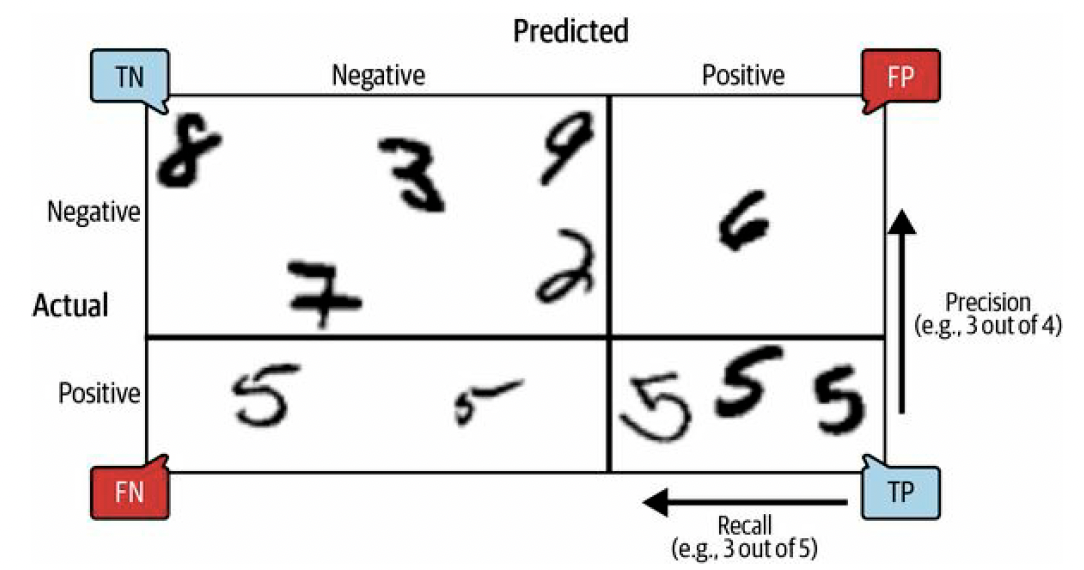

**Figura 3.2.2.1.** Una matriz de confusión ilustrada mostrando ejemplos de verdaderos negativos (*true negatives*, arriba a la izquierda), falsos positivos (*false positives*, arriba a la derecha), falsos negativos (*false negatives*, abajo a la izquierda), y verdaderos positivos (*true positives*, abajo a la derecha).

Un clasificador con **precisión perfecta** puede ser trivial porque puede obtenerse sin realmente "saber" clasificar bien. Veamos por qué.

¿Qué significa tener precisión perfecta?

La **precisión** (*precision*) mide:

$$\text{Precisión} = \frac{TP}{TP + FP}$$

Es decir: *de todas las predicciones positivas que hizo el modelo, cuántas fueron correctas*.

¿Cómo se obtiene una precisión perfecta de manera trivial?

Imagina que un modelo **siempre predice "negativo"**, excepto una vez, cuando está muy seguro, y predice "positivo".

Si justo esa única predicción positiva es correcta:

- TP = 1 (acertó la única predicción positiva)
- FP = 0 (no cometió ningún falso positivo)

Entonces:

$$\text{Precisión} = \frac{1}{1 + 0} = 1 = 100\%$$

El modelo tiene **precisión perfecta** (100%), pero lo hizo sin realmente clasificar bien. Solo dijo "NO" a casi todo, ignorando la gran mayoría de instancias positivas.

### 3.2.3. Precisión y Sensibilidad (Precision and Recall)

Scikit-learn proporciona una serie de funciones para calcular métricas de clasificacion, incluyendo la precisión y la sensibilidad (precision and recall)


In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [29]:
# Este código también calcula la precisión: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [30]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [31]:
# Este código también calcula la sensibilidad: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

Ahora nuestro detector de '5' no luce tan bien como antes cuando mirábamos la **precisión**. Cuando el clasificador indica que la imagen es un '5', es correcto solo el 83.7% de las veces. Además, solo detecta el 65.1% de los '5'.

A veces es conveniente combinar estas dos métricas de **precisión** y **sensibilidad** (*recall*) en una sola métrica llamada **puntuación F1** (*F1 score*), especialmente cuando necesitas una única métrica para comparar clasificadores.

La **puntuación F1** es la **media armónica** de la precisión y la sensibilidad.

> **Nota:** La media armónica (designada usualmente mediante $H$) de una cantidad finita de números es igual al recíproco, o inverso, de la media aritmética de los recíprocos de dichos valores y es recomendada para promediar velocidades.

Así, dados $n$ números $x_1, x_2, \ldots, x_n$, la media armónica será igual a:

$$H = \frac{n}{\sum_{i=1}^{n}\frac{1}{x_i}} = \frac{n}{\frac{1}{x_1} + \cdots + \frac{1}{x_n}}$$

**Propiedades de la media armónica:**
- Resulta poco influida por la existencia de determinados valores mucho más grandes que el conjunto de los otros
- Es sensible a valores mucho más pequeños que el conjunto
- No está definida en el caso de que exista algún valor nulo

Mientras que la **media aritmética** trata a todos los valores por igual, la **media armónica** le da más peso a los valores más pequeños. Como resultado, la **puntuación F1** será alta solo si tanto la precisión como la sensibilidad son altas. Para calcular la puntuación F1 usemos la función `f1_score()`.

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [33]:
# Este código también calcula la puntuación F1
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

La **puntuación F1** favorece a los clasificadores que tienen valores de **precisión** y **sensibilidad** similares. Sin embargo, algunas veces esto no es realmente lo que queremos, ya que en algunos contextos nos interesará una precisión alta, pero en otros nos interesará una sensibilidad alta.

Desafortunadamente, no vas a poder tener ambas métricas altas simultáneamente: incrementar la precisión reducirá la sensibilidad, e incrementar la sensibilidad reducirá la precisión. Esto se llama **compromiso entre precisión y sensibilidad** (*precision/recall trade-off*).

### 3.2.4. El compromiso entre la precisión y la sensibilidad

Para entender este compromiso, echemos un vistazo a cómo el clasificador `SGDClassifier` hace la decisión de clasificación. Para cada instancia, calcula una **puntuación** basada en una función de decisión. Si esa puntuación es superior a un **umbral** (*threshold*), asigna la instancia a la clase positiva. En caso contrario, la asigna a la clase negativa.

Scikit-learn no permite establecer el umbral directamente, pero sí nos da acceso a las puntuaciones de decisión que utiliza para hacer las predicciones. En lugar de llamar al método `predict()` del clasificador, podemos llamar al método `decision_function()`, que devuelve una puntuación para cada instancia, y ahí podemos usar el umbral que queramos para hacer predicciones basadas en esas puntuaciones.

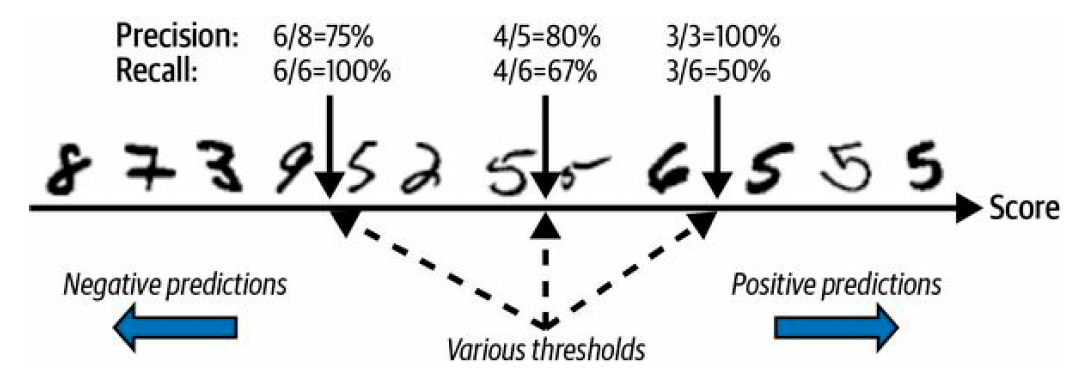

In [34]:
# === OBTENCIÓN DE LA PUNTUACIÓN DE DECISIÓN ===
#
# CONCEPTO: En lugar de obtener directamente la predicción (True/False), obtenemos
# la puntuación de decisión que el clasificador usa internamente para tomar la decisión.
#
# IMPLEMENTACIÓN:
# - decision_function(): Devuelve la puntuación de decisión para cada instancia
# - Esta puntuación representa la "distancia" (o margen) del punto de datos
#   respecto a la frontera de decisión (hyperplane)
#
# INTERPRETACIÓN DE LA PUNTUACIÓN:
# - Si la puntuación > 0: El clasificador predice clase positiva (es '5')
# - Si la puntuación < 0: El clasificador predice clase negativa (no es '5')
# - Cuanto mayor es el valor absoluto, mayor es la confianza del clasificador
#
# USO: Estas puntuaciones nos permiten ajustar el umbral de decisión manualmente
# para controlar el compromiso entre precisión y sensibilidad.

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [35]:
# === APLICACIÓN MANUAL DEL UMBRAL DE DECISIÓN ===
#
# CONCEPTO: Ahora que tenemos la puntuación de decisión, podemos aplicar nuestro
# propio umbral para convertirla en una predicción (True/False).
#
# IMPLEMENTACIÓN:
# 1. threshold = 0: Definimos el umbral de decisión en 0
#    - Este es el umbral por defecto que usa SGDClassifier internamente
#    - Puntuaciones > 0 → predice clase positiva (True)
#    - Puntuaciones ≤ 0 → predice clase negativa (False)
#
# 2. (y_scores > threshold): Comparamos la puntuación con el umbral
#    - Devuelve un array booleano con True/False
#    - Esto replica exactamente lo que hace el método predict()
#
# CONTROL DEL COMPROMISO PRECISIÓN/SENSIBILIDAD:
# - Aumentar el umbral (ej: threshold = 3000):
#   → Mayor precisión (menos falsos positivos)
#   → Menor sensibilidad (más falsos negativos)
# - Disminuir el umbral (ej: threshold = -3000):
#   → Mayor sensibilidad (menos falsos negativos)
#   → Menor precisión (más falsos positivos)

threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [36]:
# === VERIFICACIÓN DE LA PREDICCIÓN MANUAL ===
#
# Mostramos el resultado de aplicar manualmente el umbral de decisión.
# 
# RESULTADO ESPERADO:
# - Un array booleano con True o False
# - True: El clasificador predice que la imagen es un '5'
# - False: El clasificador predice que la imagen NO es un '5'
#
# NOTA: Este resultado debería ser idéntico a usar sgd_clf.predict([some_digit])
# porque estamos usando el mismo umbral por defecto (threshold = 0).

y_some_digit_pred

array([ True])

In [37]:
# === VERIFICACIÓN: UMBRAL POR DEFECTO DEL CLASIFICADOR ===
#
# OBJETIVO: Demostrar que y_scores > 0 produce exactamente el mismo resultado
# que llamar a sgd_clf.predict()
#
# INTERPRETACIÓN:
# - Esta verificación confirma que el umbral por defecto usado internamente
#   por SGDClassifier es exactamente 0
# - Cualquier puntuación > 0 → predice clase positiva (True)
# - Cualquier puntuación ≤ 0 → predice clase negativa (False)
#
# IMPORTANCIA:
# - Confirma que entendemos correctamente el mecanismo interno de decisión
# - Nos da la confianza para ajustar manualmente el umbral cuando sea necesario
# - Establece la base para explorar diferentes umbrales y su impacto en
#   el compromiso entre precisión y sensibilidad

y_scores > 0

array([ True])

El clasificador `SGDClassifier` usa un **umbral de cero** por defecto, por lo que el código anterior devuelve el mismo resultado que el método `predict()`. 

Ahora aumentemos el umbral para ver cómo afecta las predicciones y el compromiso entre precisión y sensibilidad:

In [38]:
# === EXPERIMENTO: AUMENTO DEL UMBRAL DE DECISIÓN ===
#
# CONFIGURACIÓN:
# - threshold = 3000: Establecemos un umbral mucho más alto que el por defecto (0)
# - Esto hace que el clasificador sea mucho más "estricto" o "conservador"
#   para clasificar una instancia como positiva (es '5')
#
# EFECTO EN EL CLASIFICADOR:
# - Solo clasifica como '5' si la puntuación de decisión > 3000
# - Requiere mucha más "confianza" para predecir la clase positiva
#
# IMPACTO EN PRECISIÓN Y SENSIBILIDAD:
# - ↑ Precisión: Menos falsos positivos (solo predice '5' cuando está muy seguro)
# - ↓ Sensibilidad: Más falsos negativos (rechaza muchos '5' verdaderos)
#
# RESULTADO ESPERADO:
# - Probablemente obtendremos False (no es '5') para most_digit
# - Incluso si la puntuación original era positiva, ahora puede no superar
#   este umbral tan alto, demostrando el trade-off precisión/sensibilidad

threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Esto confirma que aumentar el umbral reduce la **sensibilidad** (*recall*). La imagen realmente representa el dígito '5', y el clasificador lo detecta cuando el umbral es cero, pero se equivoca cuando el umbral se aumenta a 3000.

¿Cómo podemos decidir qué umbral utilizar? Bueno, primero habría que utilizar la función `cross_val_predict()` para obtener las puntuaciones de todas las instancias del conjunto de datos de entrenamiento, pero esta vez especificando que queremos obtener las **puntuaciones de decisión** (*decision scores*), en lugar de las predicciones directas.

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

Con estas puntuaciones, utilizamos la función `precision_recall_curve()` para calcular la **precisión** y la **sensibilidad** (*recall*) para todos los posibles umbrales.

> **Nota:** La función añade un último punto con precisión = 0 y recall = 1, correspondiente a un umbral infinito (donde el clasificador nunca predice la clase positiva).

In [40]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Finalmente, usamos `matplotlib` para graficar la **curva de precisión/sensibilidad** (*precision/recall curve*) como función del valor del umbral. Veamos cómo se ve con el umbral de 3000 que usamos anteriormente:

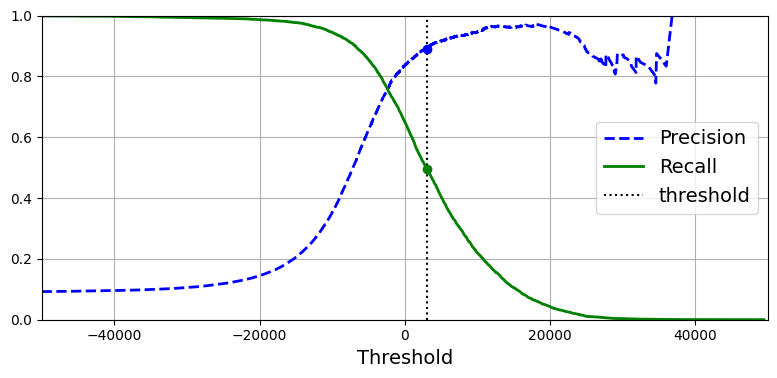

In [41]:
# === VISUALIZACIÓN: CURVA PRECISIÓN/SENSIBILIDAD VS UMBRAL ===
#
# OBJETIVO: Graficar cómo varían la precisión y la sensibilidad en función
# del valor del umbral, para ayudarnos a seleccionar el umbral óptimo.

# Crear figura con tamaño personalizado
plt.figure(figsize=(8, 4))

# Graficar las curvas de precisión y sensibilidad
# - precisions[:-1]: Excluimos el último valor (precisión=0 para umbral infinito)
# - recalls[:-1]: Excluimos el último valor (recall=1 para umbral infinito)
# - "b--": Línea azul discontinua para precisión
# - "g-": Línea verde continua para sensibilidad (recall)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# Línea vertical punteada que marca el umbral de 3000 que estamos analizando
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# === MARCADORES EN EL UMBRAL SELECCIONADO ===
# Encontrar el índice donde el umbral alcanza el valor seleccionado (3000)
idx = (thresholds >= threshold).argmax()  # primer índice ≥ threshold

# Marcar con puntos azul y verde los valores de precisión y recall en ese umbral
plt.plot(thresholds[idx], precisions[idx], "bo")  # punto azul para precisión
plt.plot(thresholds[idx], recalls[idx], "go")     # punto verde para recall

# === CONFIGURACIÓN DEL GRÁFICO ===
plt.axis([-50000, 50000, 0, 1])  # Rango de ejes: x=[-50k, 50k], y=[0, 1]
plt.grid()                        # Añadir grid para mejor legibilidad
plt.xlabel("Threshold")           # Etiqueta del eje x
plt.legend(loc="center right")    # Leyenda en el centro-derecha
save_fig("precision_recall_vs_threshold_plot")  # Guardar figura

# Mostrar el gráfico
plt.show()

> **Nota:** Puede que te preguntes por qué la curva de **precisión** es más irregular que la curva de **sensibilidad** (*recall*). La razón es que la precisión a veces puede disminuir cuando aumentas el umbral (aunque en general tiende a subir). Por otro lado, el recall solo puede disminuir cuando el umbral aumenta, lo que explica por qué su curva se ve suave.

Con el valor de umbral de 3000, la **precisión** está cerca del 90% y la **sensibilidad** está sobre el 50%. 

Otra forma de elegir un buen umbral para este compromiso (*trade-off*) entre la precisión y la sensibilidad es graficar la precisión directamente contra la sensibilidad.

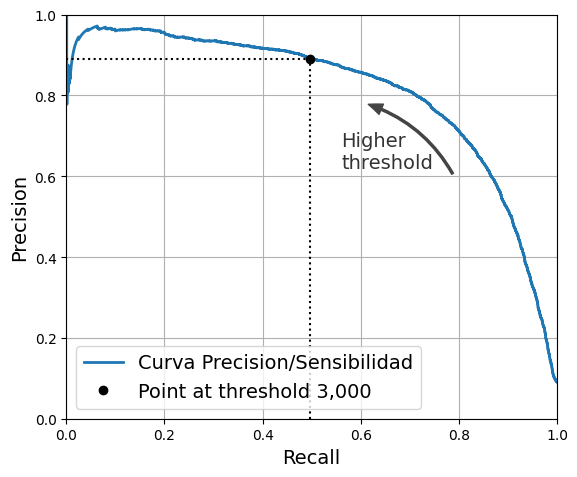

In [42]:
# === VISUALIZACIÓN: CURVA PRECISIÓN VS SENSIBILIDAD ===
#
# OBJETIVO: Graficar la precisión directamente contra la sensibilidad (curva PR).
# Esta visualización facilita la selección del umbral óptimo según nuestras
# prioridades (mayor precisión vs mayor sensibilidad).

# Importar módulo para crear la flecha curva anotativa
import matplotlib.patches as patches

# Crear figura con tamaño personalizado
plt.figure(figsize=(6, 5))

# Graficar la curva Precisión vs Sensibilidad
# - Eje X: Recall (sensibilidad)
# - Eje Y: Precision (precisión)
# - A medida que aumentamos el umbral, nos movemos hacia abajo-izquierda
#   (menor recall, mayor precision)
plt.plot(recalls, precisions, linewidth=2, label="Curva Precision/Sensibilidad")

# === MARCADORES PARA EL UMBRAL DE 3000 ===
# Líneas de referencia punteadas que conectan el punto con los ejes
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")  # línea vertical
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")  # línea horizontal

# Punto que marca los valores de precisión y recall para el umbral de 3000
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")

# === ANOTACIÓN: DIRECCIÓN DE UMBRALES MÁS ALTOS ===
# Flecha curva que indica hacia dónde se mueve la curva con umbrales más altos
# (menor recall, mayor precision - hacia arriba-izquierda)
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

# Texto explicativo: umbrales más altos se mueven en dirección de la flecha
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")

# === CONFIGURACIÓN DEL GRÁFICO ===
plt.xlabel("Recall")              # Eje X: Sensibilidad
plt.ylabel("Precision")           # Eje Y: Precisión
plt.axis([0, 1, 0, 1])           # Ambos ejes van de 0 a 1 (porcentajes)
plt.grid()                        # Añadir grid
plt.legend(loc="lower left")      # Leyenda en la esquina inferior izquierda
save_fig("precision_vs_recall_plot")  # Guardar figura

# Mostrar el gráfico
plt.show()

Se puede ver que la **precisión** realmente cae abruptamente más o menos al 80% de la **sensibilidad**. La decisión del umbral dependerá del proyecto, por supuesto. 

Supongamos que queremos un 90% de precisión. Podemos usar el primer gráfico que hicimos antes para encontrar el umbral que queremos usar, pero no es muy preciso. 

De forma alternativa, podemos buscar el **umbral más pequeño** para el cual obtenemos una precisión del 90%. Para esto, podemos usar el método `argmax()` de NumPy. Este método devuelve el primer índice del valor máximo, que en este caso significa el primer valor verdadero (el primer umbral donde se cumple la condición de precisión ≥ 90%).

In [43]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

Para hacer predicciones (de momento sobre el conjunto de datos de entrenamiento), en lugar de llamar al método `predict()` del clasificador, podemos ejecutar el siguiente código:

In [44]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

Vamos a verificar la **precisión** y la **sensibilidad** (*recall*) para estas predicciones:

In [45]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [46]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

Genial, tenemos un clasificador con una **precisión** del 90%. Es fácil crear un clasificador con la precisión que queramos: solo debemos aumentar el umbral, y listo.

Pero claro, un clasificador con una **precisión** alta no es muy útil si la **sensibilidad** (*recall*) es muy baja. Para muchas aplicaciones, un 48% de sensibilidad no es muy bueno.

Si alguien pregunta o dice que va a construir un clasificador con una precisión del 99%, deberíamos preguntarle: **¿A costa de cuánta sensibilidad?** Este es el punto clave del compromiso precisión/sensibilidad.

### 3.2.5. La curva ROC

La **curva ROC** (*Receiver Operating Characteristic*) es otra herramienta comúnmente usada con clasificadores binarios. Es muy similar a la curva de precisión/sensibilidad, pero en lugar de representar precisión frente a recall, la curva ROC representa la **tasa de verdaderos positivos** (*True Positive Rate* - **TPR**, otro nombre para *recall*) frente a la **tasa de falsos positivos** (*False Positive Rate* - **FPR**).

La **FPR** (también llamada *fall-out*) es la proporción de instancias negativas que se clasifican incorrectamente como positivas. Es igual a 1 menos la **tasa de verdaderos negativos** (*True Negative Rate* - **TNR**), que es la proporción de instancias negativas clasificadas correctamente como negativas. La **TNR** también se llama **especificidad** (*specificity*). Por lo tanto, la curva ROC representa la **sensibilidad** (*recall*) frente a 1 – **especificidad**.

Para trazar la curva ROC, primero usamos la función `roc_curve()` para calcular la TPR y la FPR para varios valores de umbral:

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Luego de esto podemos graficar la **FPR** frente a la **TPR** usando `matplotlib`. 

Para encontrar el punto que se corresponde con el 90% de **precisión**, necesitamos mirar los índices del umbral deseado. Dado que los umbrales están listados en orden decreciente en este caso, usaremos `<=` en lugar de `>=` en la primera línea:

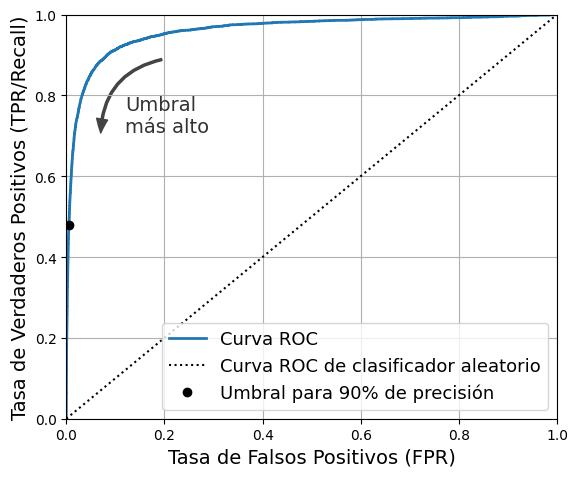

In [48]:
# === VISUALIZACIÓN: CURVA ROC ===
#
# OBJETIVO: Graficar la curva ROC (Receiver Operating Characteristic) que muestra
# el compromiso entre la tasa de verdaderos positivos (TPR) y la tasa de falsos
# positivos (FPR) para diferentes valores de umbral.

# Encontrar el índice del umbral que corresponde al 90% de precisión
# Usamos <= porque los umbrales están ordenados de forma decreciente
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()

# Obtener los valores de TPR y FPR para ese umbral específico
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

# Crear figura con tamaño personalizado
plt.figure(figsize=(6, 5))

# === GRAFICACIÓN DE LA CURVA ROC ===
# Graficar la curva ROC del clasificador SGD
# - Eje X: FPR (False Positive Rate - tasa de falsos positivos)
# - Eje Y: TPR (True Positive Rate - tasa de verdaderos positivos o recall)
plt.plot(fpr, tpr, linewidth=2, label="Curva ROC")

# Línea diagonal: representa un clasificador aleatorio (sin capacidad predictiva)
# Un clasificador aleatorio tendría TPR = FPR, formando una línea diagonal
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC de clasificador aleatorio")

# Marcar el punto que corresponde al umbral para 90% de precisión
plt.plot([fpr_90], [tpr_90], "ko", label="Umbral para 90% de precisión")

# === ANOTACIÓN: DIRECCIÓN DE UMBRALES MÁS ALTOS ===
# Flecha curva que indica hacia dónde se mueve la curva con umbrales más altos
# (hacia abajo-izquierda: menor TPR y menor FPR)
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

# Texto explicativo: umbrales más altos se mueven en dirección de la flecha
plt.text(0.12, 0.71, "Umbral\nmás alto", color="#333333")

# === CONFIGURACIÓN DEL GRÁFICO ===
plt.xlabel('Tasa de Falsos Positivos (FPR)')    # Eje X
plt.ylabel('Tasa de Verdaderos Positivos (TPR/Recall)')  # Eje Y
plt.grid()                                       # Añadir grid
plt.axis([0, 1, 0, 1])                          # Ambos ejes van de 0 a 1
plt.legend(loc="lower right", fontsize=13)       # Leyenda en la esquina inferior derecha
save_fig("roc_curve_plot")                      # Guardar figura

# Mostrar el gráfico
plt.show()

Una vez más, existe un compromiso: cuanto mayor es el **recall** (**TPR**), más **falsos positivos** (**FPR**) produce el clasificador. La línea punteada representa la curva ROC de un clasificador completamente aleatorio; un buen clasificador se mantiene lo más alejado posible de esa línea (hacia la esquina superior izquierda).

Una forma de comparar clasificadores es medir el **área bajo la curva** (*Area Under the Curve* - **AUC**). Un clasificador perfecto tendrá un **ROC AUC** igual a 1, mientras que un clasificador completamente aleatorio tendrá un ROC AUC igual a 0.5. Scikit-Learn proporciona una función para estimar el ROC AUC:

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Dado que la **curva ROC** es muy similar a la **curva de precisión/sensibilidad** (*precision/recall curve* - **curva PR**), puede que te preguntes cómo decidir cuál usar. Como regla general, deberías preferir la **curva PR** cuando la **clase positiva es rara** o cuando te importan más los **falsos positivos** que los **falsos negativos**. En caso contrario, usa la **curva ROC**.

Por ejemplo, al observar la curva ROC anterior (y la puntuación **ROC AUC**), podrías pensar que el clasificador es realmente bueno. Pero esto se debe principalmente a que hay pocas instancias positivas (los '5') en comparación con las negativas (los no-'5'). En contraste, la **curva PR** deja claro que el clasificador tiene margen de mejora: la curva podría estar mucho más cerca de la esquina superior derecha.

Vamos a crear ahora un `RandomForestClassifier`, cuya **curva de precisión vs sensibilidad** y **puntuación F1** podemos comparar con las del `SGDClassifier`:

In [50]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

La función `precision_recall_curve()` espera etiquetas y puntuaciones para cada instancia, así que necesitamos entrenar el clasificador `RandomForestClassifier` y hacer que asigne una puntuación a cada instancia. Pero la clase `RandomForestClassifier` no tiene un método `decision_function()`, debido a la forma en que funciona. Por suerte, tiene un método `predict_proba()` que devuelve las **probabilidades de cada clase** para cada instancia, y podemos simplemente usar la probabilidad de la clase positiva como puntuación, así que funcionará sin problemas.

Podemos llamar a la función `cross_val_predict()` para entrenar el `RandomForestClassifier` usando **validación cruzada** y hacer que prediga probabilidades de clase para cada imagen de la siguiente manera:

In [51]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

Veamos las **probabilidades de clase** de las dos primeras imágenes del conjunto de entrenamiento:

In [52]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

El modelo predice que la primera imagen es positiva con una **probabilidad del 89%**, y predice que la segunda imagen es negativa con un **99% de probabilidad**. Como cada imagen es positiva o negativa, la suma de las probabilidades en cada fila es del 100%.

> **Advertencia:** Estas son **probabilidades estimadas**, no **probabilidades reales**. Por ejemplo, si observas todas las imágenes que el modelo clasificó como positivas con una probabilidad estimada entre el 50% y el 60%, aproximadamente el 94% de ellas son realmente positivas. Así que, en este caso, las probabilidades estimadas por el modelo eran demasiado bajas... pero los modelos también pueden ser excesivamente confiados.

In [53]:
# === VERIFICACIÓN DE CALIBRACIÓN DEL MODELO ===
#
# OBJETIVO: Verificar si las probabilidades estimadas por el modelo corresponden
# a las probabilidades reales. Un modelo bien calibrado debería tener probabilidades
# estimadas cercanas a las probabilidades reales.
#
# MÉTODO:
# 1. Seleccionamos todas las instancias que el modelo predijo con probabilidad
#    entre 50% y 60% de ser positivas (clase '5')
# 2. Calculamos qué porcentaje de esas instancias son realmente positivas
#
# INTERPRETACIÓN:
# - Si el modelo está bien calibrado: esperaríamos aproximadamente 50-60% de
#   verdaderos positivos en este rango de probabilidades
# - Si el resultado es significativamente diferente: el modelo está mal calibrado
#   - Resultado > 60%: el modelo subestima las probabilidades (es pesimista)
#   - Resultado < 50%: el modelo sobreestima las probabilidades (es optimista)

# Crear máscara booleana: True para instancias con probabilidad entre 50% y 60%
# y_probas_forest[:, 1] accede a la columna de probabilidades de la clase positiva
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)

# Calcular el porcentaje real de positivos en ese rango de probabilidades
# - y_train_5[idx_50_to_60].sum(): cuenta cuántas instancias son realmente positivas
# - idx_50_to_60.sum(): cuenta cuántas instancias en total están en ese rango
# - El resultado nos dice si el modelo está bien calibrado
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

94.0%


El paquete `sklearn.calibration` contiene herramientas para calibrar las **probabilidades estimadas** y acercarlas mucho más a las **probabilidades reales**.

La segunda columna contiene las probabilidades estimadas para la **clase positiva**, así que pasémoslas a la función `precision_recall_curve()`:

In [54]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

Ahora estamos en disposición de graficar la **curva PR** del `RandomForestClassifier`. Es útil graficar también la primera curva PR (del `SGDClassifier`), así podemos comparar ambos clasificadores:

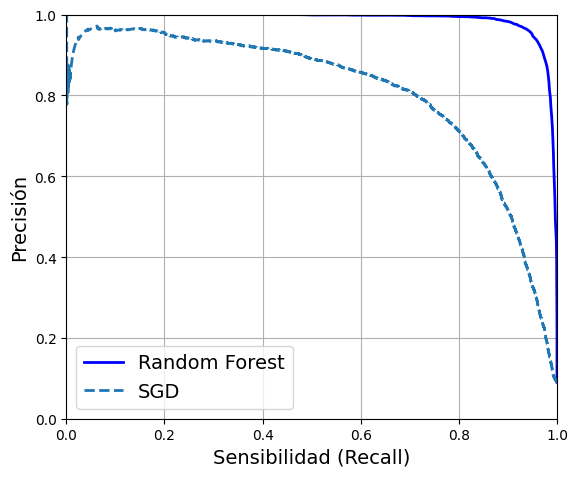

In [55]:
# === COMPARACIÓN DE CURVAS PRECISIÓN/SENSIBILIDAD ===
#
# OBJETIVO: Comparar visualmente el rendimiento de RandomForestClassifier vs
# SGDClassifier mediante sus curvas de precisión/sensibilidad (PR).
#
# INTERPRETACIÓN:
# - La curva que está más cerca de la esquina superior derecha es mejor
# - Esa posición indica alta precisión Y alta sensibilidad simultáneamente
# - Podemos ver visualmente qué clasificador tiene mejor compromiso precisión/sensibilidad

# Crear figura con tamaño personalizado
plt.figure(figsize=(6, 5))

# === GRAFICACIÓN DE LAS DOS CURVAS PR ===
# Curva del Random Forest: línea azul continua
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")

# Curva del SGD Classifier: línea discontinua
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# === CONFIGURACIÓN DEL GRÁFICO ===
plt.xlabel("Sensibilidad (Recall)")    # Eje X: Sensibilidad/Recall
plt.ylabel("Precisión")                 # Eje Y: Precisión
plt.axis([0, 1, 0, 1])                 # Ambos ejes van de 0 a 1
plt.grid()                              # Añadir grid para mejor legibilidad
plt.legend(loc="lower left")            # Leyenda en la esquina inferior izquierda
save_fig("pr_curve_comparison_plot")   # Guardar figura

# Mostrar el gráfico
plt.show()

Como se puede ver, el `RandomForestClassifier` y su **curva PR** lucen mucho mejor que el `SGDClassifier`: se acerca mucho más a la esquina superior derecha. Su **puntuación F1** y su **puntuación ROC AUC** son también mucho mejores:

In [56]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5 # probabilidad positiva >= 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [57]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

Intenta medir las puntuaciones de **precisión** y **sensibilidad**: deberías encontrar algo sobre el **99.1% de precisión** y un **86.6% de sensibilidad**. Nada mal.

In [58]:
precision_score(y_train_5, y_train_pred_forest)

0.9897468089558485

In [59]:
recall_score(y_train_5, y_train_pred_forest)

0.8725327430363402

Ahora sabes entrenar un **clasificador binario**: elegir una **métrica apropiada** para tu caso de uso, evaluar el clasificador usando **validación cruzada**, seleccionar el **compromiso entre precisión y sensibilidad** (*precision/recall trade-off*) que se ajuste a tus necesidades, y usar una serie de métricas y curvas para comparar varios modelos. 

Ahora podemos intentar detectar más de un único dígito.

## 3.3. Clasificación Multiclase

Mientras que los **clasificadores binarios** distinguen entre dos clases, los **clasificadores multiclase** (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases.

Algunos clasificadores de Scikit-Learn (por ejemplo, `LogisticRegression`, `RandomForestClassifier` y `GaussianNB`) pueden manejar múltiples clases de forma nativa. Otros son estrictamente clasificadores binarios (por ejemplo, `SGDClassifier` y `SVC`). Sin embargo, existen varias estrategias que permiten realizar clasificación multiclase usando múltiples clasificadores binarios.

Una forma de crear un sistema capaz de clasificar imágenes de dígitos en 10 clases (del 0 al 9) es entrenar 10 clasificadores binarios, uno para cada dígito (un detector de '0', un detector de '1', un detector de '2', etc.). Luego, cuando quieras clasificar una imagen, obtienes la puntuación de decisión de cada clasificador para esa imagen y seleccionas la clase cuyo clasificador produzca la puntuación más alta. Esto se llama la estrategia **uno contra el resto** (*One-vs-Rest* - **OvR**), o a veces **uno contra todos** (*One-vs-All* - **OvA**).

Otra estrategia es entrenar un clasificador binario para cada par de dígitos: uno que distinga entre 0 y 1, otro entre 0 y 2, otro entre 1 y 2, y así sucesivamente. Esto se denomina estrategia **uno contra uno** (*One-vs-One* - **OvO**). Si hay N clases, necesitas entrenar N × (N – 1) / 2 clasificadores. Para el problema de MNIST, ¡esto implica entrenar 45 clasificadores binarios! Cuando quieras clasificar una imagen, debes pasarla por los 45 clasificadores y ver qué clase gana más "duelos". La principal ventaja de **OvO** es que cada clasificador solo necesita entrenarse con la parte del conjunto de entrenamiento que contiene las dos clases que debe distinguir.

Algunos algoritmos (como los clasificadores de máquinas de vectores de soporte o *Support Vector Machines*) escalan mal con el tamaño del conjunto de entrenamiento. Para estos algoritmos se prefiere **OvO**, ya que es más rápido entrenar muchos clasificadores con conjuntos pequeños que entrenar unos pocos clasificadores con conjuntos grandes. Sin embargo, para la mayoría de algoritmos de clasificación binaria, se prefiere **OvR**.

Scikit-Learn detecta cuando intentas usar un algoritmo de clasificación binaria para una tarea de clasificación multiclase, y ejecuta automáticamente **OvR** u **OvO**, dependiendo del algoritmo. Probemos esto con un clasificador de máquina de vectores de soporte utilizando la clase `sklearn.svm.SVC`. Solo entrenaremos con las primeras 2,000 imágenes, de lo contrario, llevará muchísimo tiempo:

In [60]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Entrenamos el `SVC` utilizando las clases objetivo originales del 0 al 9 (`y_train`), en lugar de las clases objetivo de '5' contra el resto (`y_train_5`). Dado que hay 10 clases (es decir, más de 2), Scikit-Learn utilizó la estrategia **OvO** (*One-vs-One*) y entrenó 45 clasificadores binarios. Ahora hagamos una predicción sobre una imagen:

In [61]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

¡Correcto! Este código en realidad hizo **45 predicciones**—una por cada par de clases—y seleccionó la clase que ganó más duelos. Si llamas al método `decision_function()`, verás que devuelve **10 puntuaciones por instancia**: una por cada clase. Cada clase obtiene una puntuación igual al número de duelos ganados, más o menos un pequeño ajuste (máx. ±0.33) para desempatar, basado en las puntuaciones de los clasificadores:

In [62]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

La **puntuación más alta** es **9.3** y es, en efecto, la que se corresponde con la clase '5'.

In [63]:
class_id = some_digit_scores.argmax()
class_id

5

Cuando se entrena un clasificador, este almacena la lista de clases objetivo en su atributo `classes_`, ordenadas por valor. En el caso de MNIST, el índice de cada clase en el array `classes_` coincide convenientemente con la propia clase (por ejemplo, la clase en el índice 5 resulta ser la clase '5'), pero en general no tendrás tanta suerte; tendrás que buscar la etiqueta de la clase de esta manera:

In [64]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [65]:
svm_clf.classes_[class_id]

'5'

Si quieres forzar a Scikit-Learn a usar la estrategia **uno contra uno** (**OvO** - *One-vs-One*) o **uno contra el resto** (**OvR** - *One-vs-Rest*), puedes usar las clases `OneVsOneClassifier` o `OneVsRestClassifier`. Simplemente crea una instancia y pasa un clasificador a su constructor (ni siquiera tiene que ser un clasificador binario). Por ejemplo, este código crea un clasificador multiclase usando la estrategia **OvR**, basado en un `SVC`:

In [66]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


Hagamos una predicción, y veamos el número de clasificadores entrenados:

In [67]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [68]:
len(ovr_clf.estimators_)

10

Entrenar un `SGDClassifier` sobre un conjunto de datos multiclase y usarlo para hacer predicciones es así de sencillo.

In [69]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

¡Vaya, eso es incorrecto! ¡Los errores de predicción ocurren! Esta vez Scikit-Learn usó la estrategia **OvR** (*One-vs-Rest*) internamente: dado que hay 10 clases, entrenó 10 clasificadores binarios. El método `decision_function()` ahora devuelve un valor por clase.

Veamos las **puntuaciones** que el **clasificador SGD** asignó a cada clase:

In [70]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

Puedes ver que el clasificador no está muy seguro de su predicción: casi todas las puntuaciones son muy negativas, mientras que la clase 3 tiene una puntuación de +1.824, y la clase 5 no está muy lejos con –1.386. Por supuesto, querrás evaluar este clasificador con más de una imagen. Dado que hay aproximadamente el mismo número de imágenes en cada clase, la **métrica de precisión** (_accuracy_) está bien. Como de costumbre, puedes usar la función `cross_val_score()` para evaluar el modelo:

In [71]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Obtiene más del 85.8% en todos los **pliegues de prueba** (_test folds_). Si usaras un clasificador aleatorio, obtendrías un 10% de precisión, así que no es una puntuación tan mala, pero aún puedes hacerlo mucho mejor. Simplemente **escalando las entradas** aumenta la precisión por encima del 89.1%:

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

## 3.4. Análisis de Errores

Si este fuera un proyecto real, ahora seguirías los pasos de tu lista de verificación de proyectos de aprendizaje automático. Explorarías opciones de preparación de datos, probarías múltiples modelos, preseleccionarías los mejores, ajustarías sus hiperparámetros usando `GridSearchCV` y automatizarías tanto como fuera posible. Aquí, vamos a asumir que has encontrado un modelo prometedor y quieres encontrar formas de mejorarlo. Una manera de hacer esto es analizar los tipos de errores que comete.

Primero, observa la **matriz de confusión**. Para esto, primero necesitas hacer predicciones usando la función `cross_val_predict()`; luego puedes pasar las etiquetas y predicciones a la función `confusion_matrix()`. Sin embargo, dado que ahora hay 10 clases en lugar de 2, la matriz de confusión contendrá bastantes números y puede ser difícil de leer. Un diagrama coloreado de la matriz de confusión es mucho más fácil de analizar. Para graficar dicho diagrama, usa la función `ConfusionMatrixDisplay.from_predictions()` de esta manera:

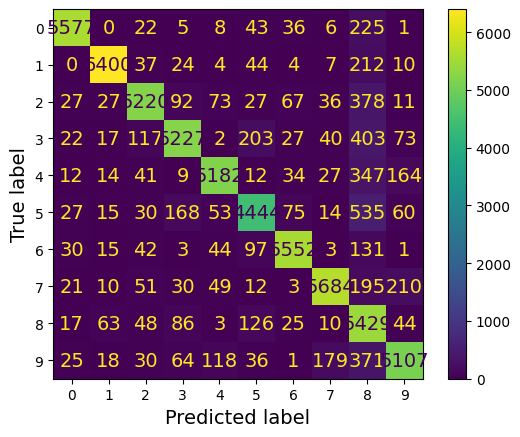

In [73]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

Esta matriz de confusión se ve bastante bien: la mayoría de las imágenes están en la diagonal principal, lo que significa que fueron clasificadas correctamente. Observa que la celda en la diagonal en la fila #5 y columna #5 se ve ligeramente más oscura que los otros dígitos. Esto podría deberse a que el modelo cometió más errores con los 5, o porque hay menos 5 en el dataset que otros dígitos. Por eso es importante **normalizar la matriz de confusión** dividiendo cada valor por el número total de imágenes en la clase (verdadera) correspondiente (es decir, dividir por la suma de la fila). Esto se puede hacer simplemente estableciendo `normalize="true"`. También podemos especificar el argumento `values_format=".0%"` para mostrar porcentajes sin decimales.

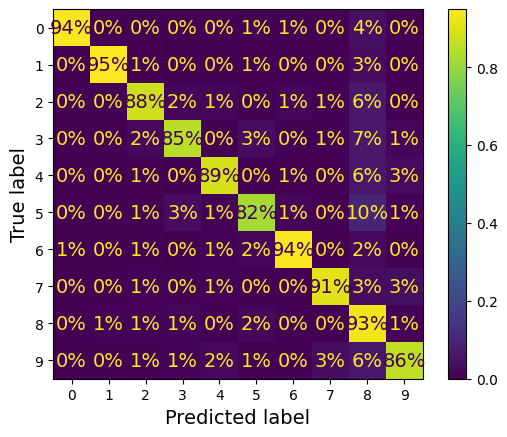

In [74]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Ahora podemos ver fácilmente que solo el 82% de las imágenes de 5 fueron clasificadas correctamente. El error más común que cometió el modelo con las imágenes de 5 fue clasificarlas erróneamente como 8: esto ocurrió en el 10% de todos los 5. ¡Pero solo el 2% de los 8 fueron clasificados erróneamente como 5; las matrices de confusión generalmente no son simétricas! Si observas con atención, notarás que muchos dígitos han sido clasificados erróneamente como 8, pero esto no es inmediatamente obvio en este diagrama. Si quieres hacer que los errores resalten más, puedes intentar poner peso cero en las predicciones correctas.

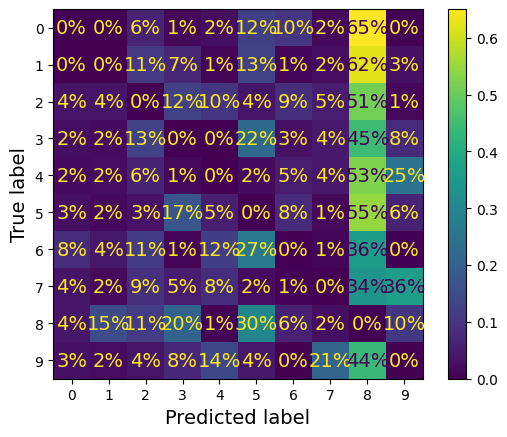

In [75]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

Pongamos todas las gráficas juntas para verlo mejor:

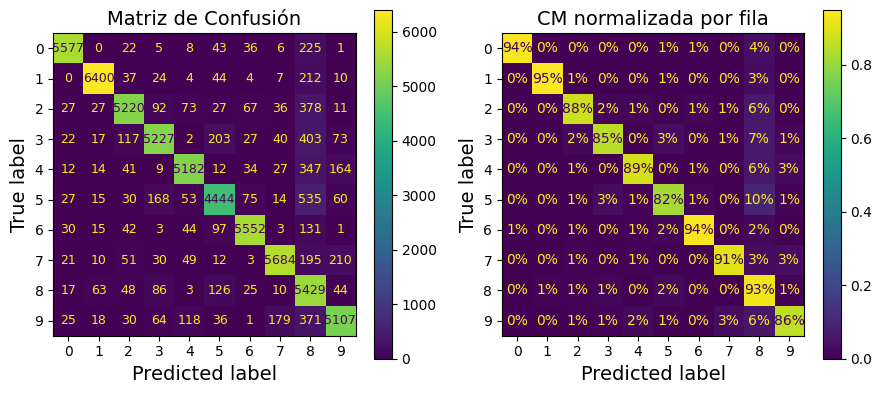

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Matriz de Confusión")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalizada por fila")
save_fig("confusion_matrix_plot_1")
plt.show()

Ahora puedes ver mucho más claramente los tipos de errores que comete el clasificador. La columna para la clase 8 está realmente brillante, lo que confirma que muchas imágenes fueron clasificadas erróneamente como 8. De hecho, esta es la clasificación errónea más común para casi todas las clases. Pero ten cuidado con cómo interpretas los porcentajes en este diagrama: recuerda que hemos excluido las predicciones correctas. Por ejemplo, el 36% en la fila #7, columna #9 no significa que el 36% de todas las imágenes de 7 fueron clasificadas erróneamente como 9. Significa que el 36% de los errores que el modelo cometió en imágenes de 7 fueron clasificaciones erróneas como 9. En realidad, solo el 3% de las imágenes de 7 fueron clasificadas erróneamente como 9.

También es posible normalizar la matriz de confusión por columna en lugar de por fila: si estableces `normalize="pred"`. Por ejemplo, puedes ver que el 56% de los 7 clasificados erróneamente son en realidad 9.

Analizar la matriz de confusión a menudo te da información sobre formas de mejorar tu clasificador. Al observar estos gráficos, parece que tus esfuerzos deberían centrarse en reducir los falsos 8. Por ejemplo, podrías intentar recopilar más datos de entrenamiento para dígitos que parecen 8 (pero no lo son) para que el clasificador pueda aprender a distinguirlos de los 8 reales. O podrías diseñar nuevas características que ayudarían al clasificador—por ejemplo, escribir un algoritmo para contar el número de **bucles cerrados** (por ejemplo, el 8 tiene dos, el 6 tiene uno, el 5 no tiene ninguno). O podrías preprocesar las imágenes (por ejemplo, usando Scikit-Image, Pillow u OpenCV) para hacer que algunos patrones, como los bucles cerrados, destaquen más.

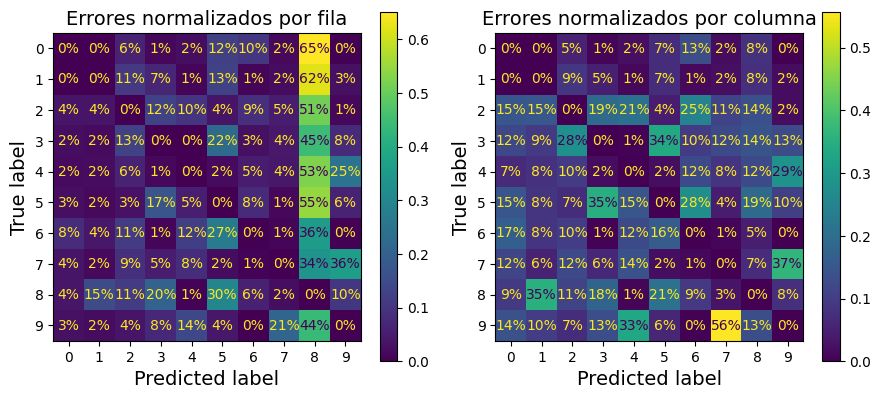

In [77]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errores normalizados por fila")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errores normalizados por columna")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)

Analizar errores individuales también puede ser una buena manera de obtener información sobre lo que está haciendo tu clasificador y por qué está fallando. Por ejemplo, tracemos ejemplos de 3 y 5 en un estilo de matriz de confusión:

In [78]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

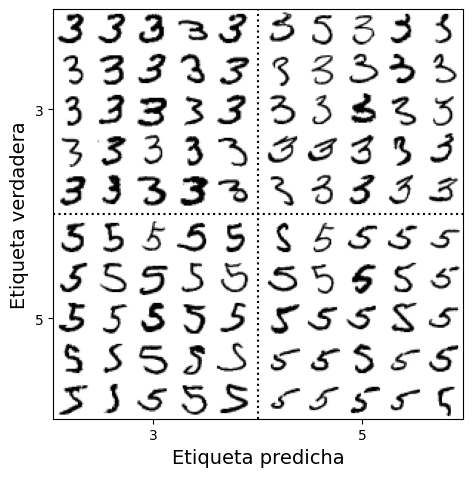

In [79]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
save_fig("error_analysis_digits_plot")
plt.show()

Como puedes ver, algunos de los dígitos que el clasificador identifica incorrectamente (es decir, en los bloques inferior izquierdo y superior derecho) están tan mal escritos que incluso un humano tendría problemas para clasificarlos. Sin embargo, la mayoría de las imágenes clasificadas erróneamente nos parecen errores obvios. Puede ser difícil entender por qué el clasificador cometió los errores que cometió, pero recuerda que el cerebro humano es un fantástico sistema de reconocimiento de patrones, y nuestro sistema visual hace mucho preprocesamiento complejo antes de que cualquier información llegue siquiera a nuestra conciencia. Entonces, el hecho de que esta tarea parezca simple no significa que lo sea. Recuerda que usamos un simple `SGDClassifier`, que es solo un modelo lineal: todo lo que hace es asignar un peso por clase a cada píxel, y cuando ve una nueva imagen simplemente suma las intensidades de píxeles ponderadas para obtener una puntuación para cada clase. Como los 3 y los 5 difieren en solo unos pocos píxeles, este modelo los confundirá fácilmente.

La principal diferencia entre los 3 y los 5 es la posición de la pequeña línea que une la línea superior con el arco inferior. Si dibujas un 3 con la unión ligeramente desplazada hacia la izquierda, el clasificador podría clasificarlo como un 5, y viceversa. En otras palabras, este clasificador es bastante sensible al desplazamiento y rotación de imágenes. Una forma de reducir la confusión entre 3 y 5 es preprocesar las imágenes para asegurar que estén bien centradas y no demasiado rotadas. Sin embargo, esto puede no ser fácil ya que requiere predecir la rotación correcta de cada imagen. Un enfoque mucho más simple consiste en **aumentar el conjunto de entrenamiento** con variantes ligeramente desplazadas y rotadas de las imágenes de entrenamiento. Esto obligará al modelo a aprender a ser más tolerante a tales variaciones. Esto se llama **aumento de datos** (_data augmentation_).

## 3.5. Clasificación Multilabel

Hasta ahora, cada instancia siempre ha sido asignada a una sola clase. Pero en algunos casos puedes querer que tu clasificador genere múltiples clases para cada instancia. Considera un clasificador de reconocimiento facial: ¿qué debería hacer si reconoce varias personas en la misma imagen? Debería adjuntar una etiqueta por cada persona que reconozca. Supongamos que el clasificador ha sido entrenado para reconocer tres caras: Alice, Bob y Charlie. Entonces, cuando se le muestre al clasificador una imagen de Alice y Charlie, debería generar [True, False, True] (que significa "Alice sí, Bob no, Charlie sí"). Este tipo de sistema de clasificación que genera múltiples etiquetas binarias se llama **sistema de clasificación multietiqueta** (_multilabel classification system_).

No vamos a profundizar en el reconocimiento facial todavía, pero veamos un ejemplo más simple, solo con fines ilustrativos:

In [80]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Este código crea un array `y_multilabel` que contiene dos etiquetas objetivo para cada imagen de dígito: la primera indica si el dígito es grande o no (7, 8 o 9), y la segunda indica si es impar o no. Luego el código crea una instancia de `KNeighborsClassifier`, que soporta clasificación multilabel (no todos los clasificadores lo hacen), y entrena este modelo usando el array de objetivos múltiples. Ahora puedes hacer una predicción, y observa que genera dos etiquetas:

In [81]:
knn_clf.predict([some_digit])

array([[False,  True]])

¡Y lo hace correctamente! El dígito 5 de hecho no es grande (False) y es impar (True).

Hay muchas formas de evaluar un clasificador multilabel, y seleccionar la métrica correcta realmente depende de tu proyecto. Un enfoque es medir el **F-score** para cada etiqueta individual (o cualquier otra métrica de clasificador binario discutida anteriormente), y luego simplemente calcular la puntuación promedio. El siguiente código calcula el F-score promedio en todas las etiquetas:

In [82]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

Este enfoque asume que todas las etiquetas son igualmente importantes, lo cual puede no ser el caso. En particular, si tienes muchas más imágenes de Alice que de Bob o Charlie, puedes querer dar más peso a la puntuación del clasificador en las imágenes de Alice. Una opción simple es dar a cada etiqueta un peso igual a su **soporte** (_support_), es decir, el número de instancias con esa etiqueta objetivo. Para hacer esto, simplemente establece `average="weighted"` al llamar a la función `f1_score()`.

In [83]:
# muestra que obtenemos una mejora de rendimiento insignificante cuando
# establecemos average="weighted" porque las clases ya están bastante
# bien balanceadas.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9778357403921755

Si deseas usar un clasificador que no soporta nativamente la clasificación multilabel, como `SVC`, una posible estrategia es entrenar un modelo por etiqueta. Sin embargo, esta estrategia puede tener dificultades para capturar las dependencias entre las etiquetas. Por ejemplo, un dígito grande (7, 8 o 9) tiene el doble de probabilidades de ser impar que par, pero el clasificador para la etiqueta "impar" no sabe lo que el clasificador para la etiqueta "grande" predijo. Para resolver este problema, los modelos pueden organizarse en una cadena: cuando un modelo hace una predicción, usa las características de entrada más todas las predicciones de los modelos que vienen antes en la cadena.

La buena noticia es que Scikit-Learn tiene una clase llamada `ChainClassifier` que hace exactamente eso. Por defecto, usará las etiquetas verdaderas para el entrenamiento, alimentando a cada modelo con las etiquetas apropiadas dependiendo de su posición en la cadena. Pero si estableces el hiperparámetro `cv`, usará validación cruzada para obtener predicciones "limpias" (fuera de muestra) de cada modelo entrenado para cada instancia en el conjunto de entrenamiento, y estas predicciones se usarán luego para entrenar todos los modelos posteriores en la cadena. Aquí hay un ejemplo que muestra cómo crear y entrenar un `ChainClassifier` usando la estrategia de validación cruzada. Como antes, solo usaremos las primeras 2.000 imágenes en el conjunto de entrenamiento para acelerar las cosas:

In [84]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


Ahora podemos usar este `ChainClassifier` para hacer predicciones:

In [85]:
chain_clf.predict([some_digit])

array([[0., 1.]])

## 3.6. Clasificación Multioutput

El último tipo de tarea de clasificación que discutiremos aquí se llama **clasificación multioutput-multiclase** (_multioutput–multiclass classification_) o simplemente **clasificación multioutput** (_multioutput classification_). Es una generalización de la clasificación multilabel donde cada etiqueta puede ser multiclase (es decir, puede tener más de dos valores posibles).

Para ilustrar esto, construyamos un sistema que elimine el ruido de las imágenes. Tomará como entrada una imagen de dígito ruidosa, y generará (con suerte) una imagen de dígito limpia, representada como un array de intensidades de píxeles, al igual que las imágenes MNIST. Observa que la salida del clasificador es multilabel (una etiqueta por píxel) y cada etiqueta puede tener múltiples valores (la intensidad del píxel varía de 0 a 255). Este es, por lo tanto, un ejemplo de un sistema de clasificación multioutput.

> **NOTA** La línea entre clasificación y regresión a veces es difusa, como en este ejemplo. Podría decirse que predecir la intensidad de píxeles es más similar a la regresión que a la clasificación. Además, los sistemas multioutput no están limitados a tareas de clasificación; incluso podrías tener un sistema que genere múltiples etiquetas por instancia, incluyendo tanto etiquetas de clase como etiquetas de valor.

Comencemos creando los conjuntos de entrenamiento y prueba tomando las imágenes MNIST y agregando ruido a sus intensidades de píxeles con la función `randint()` de NumPy. Las imágenes objetivo serán las imágenes originales:

In [86]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Echemos un vistazo a la primera imagen del conjunto de prueba. Sí, estamos espiando los datos de prueba, así que deberías estar frunciendo el ceño ahora mismo.

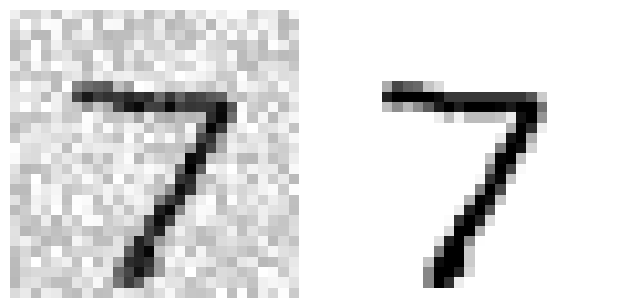

In [87]:
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

A la izquierda está la imagen de entrada ruidosa, y a la derecha está la imagen objetivo limpia. Ahora entrenemos el clasificador y hagamos que limpie esta imagen:

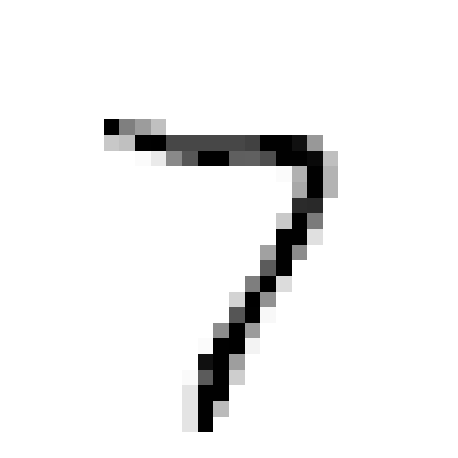

In [88]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")
plt.show()

¡Se ve bastante cercano al objetivo! Ahora sabes cómo seleccionar buenas métricas para tareas de clasificación, elegir el **balance precisión/recall** apropiado, comparar clasificadores y, en general, construir buenos sistemas de clasificación para una variedad de tareas.